In [1]:
import os
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
sys.path.append('/home/kumarv/khand035/.conda/envs/gdalenv/lib/python2.7/site-packages/')
from osgeo import gdal,ogr
import glob
from PIL import Image
%matplotlib inline

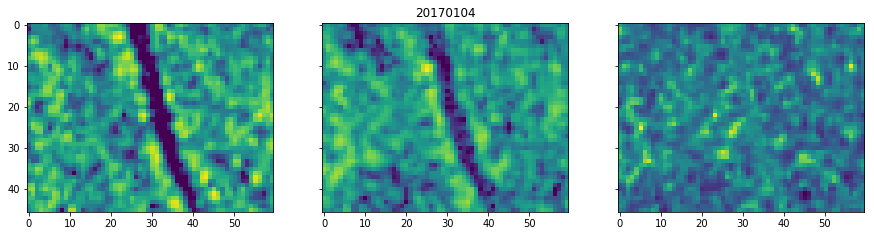

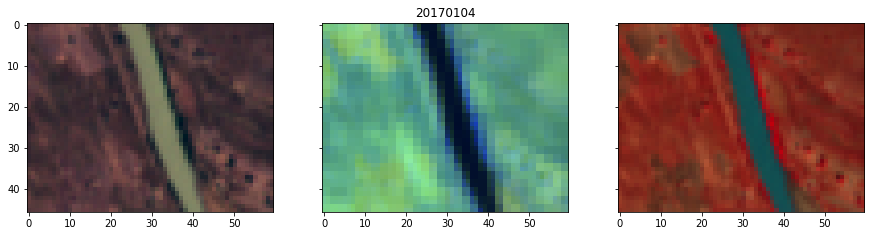

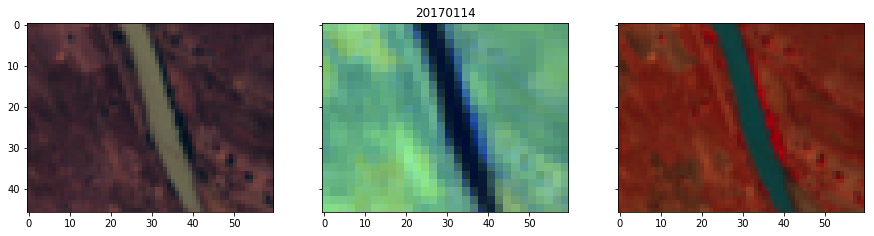

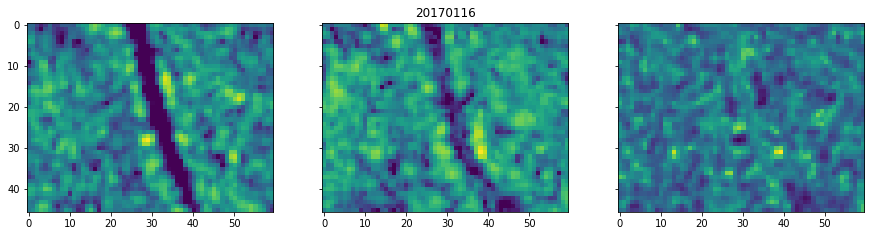

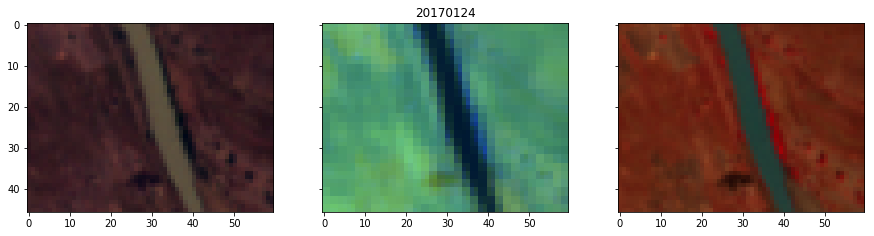

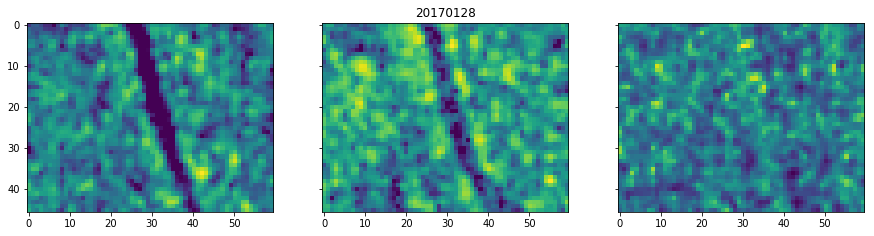

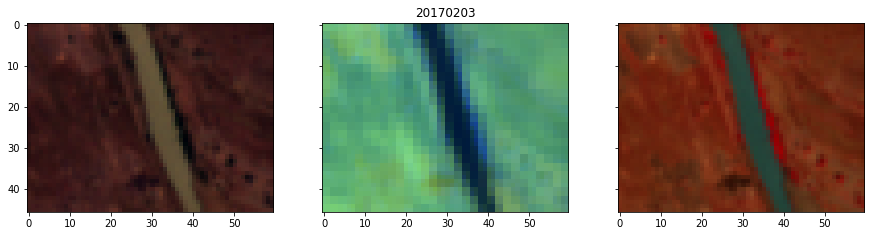

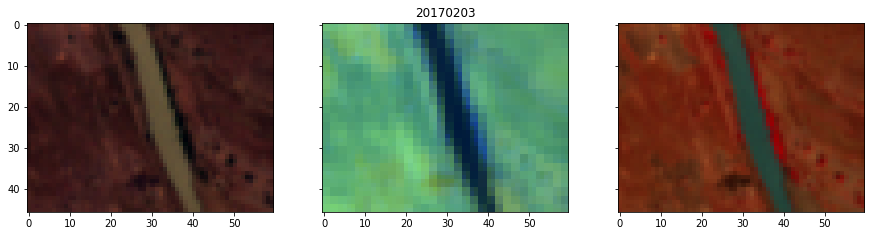

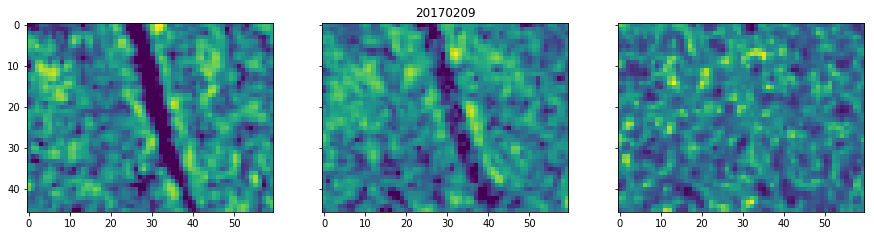

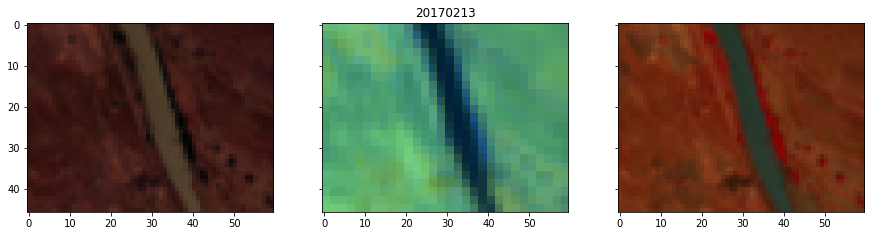

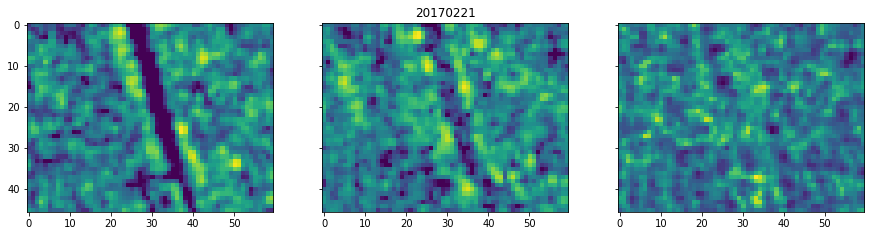

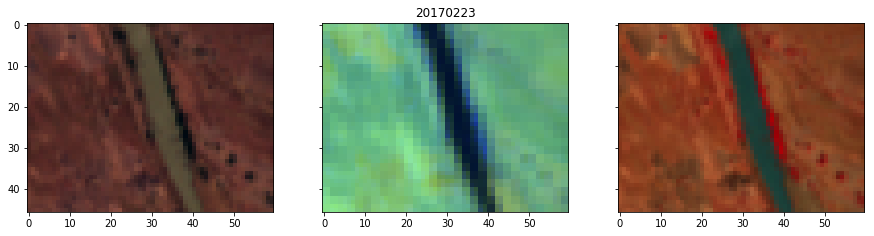

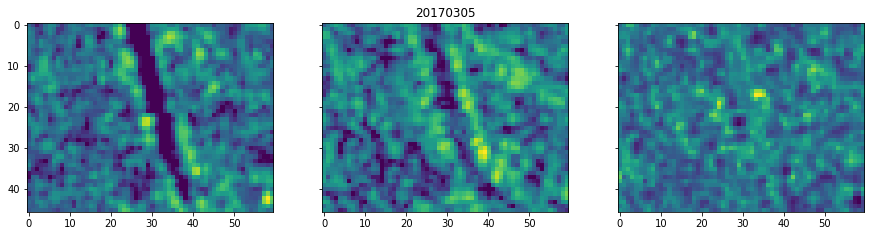

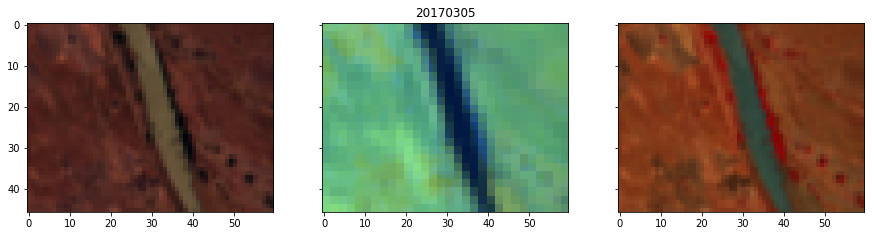

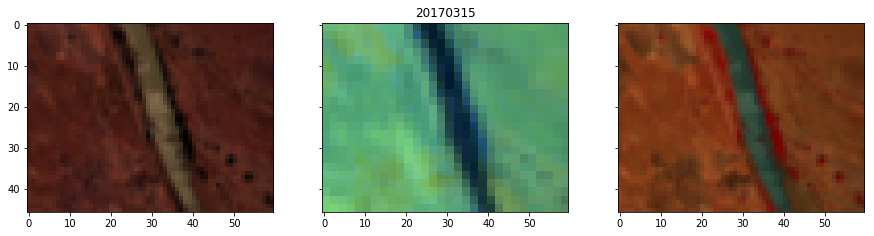

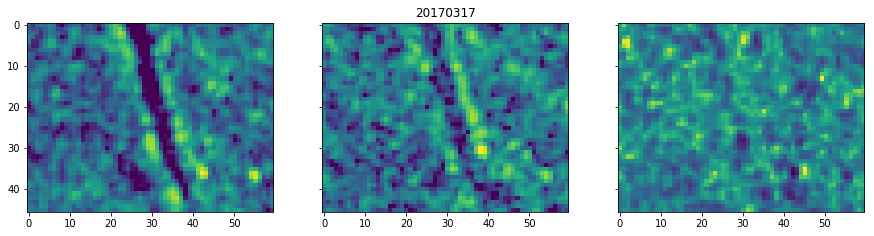

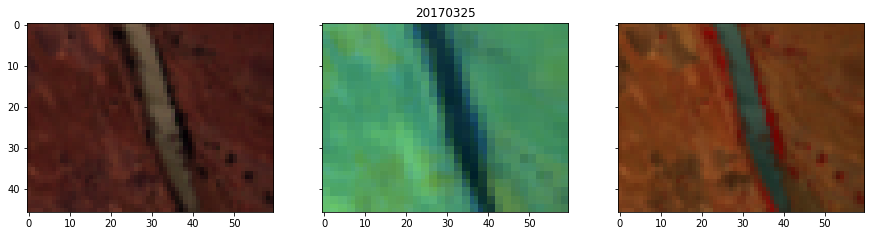

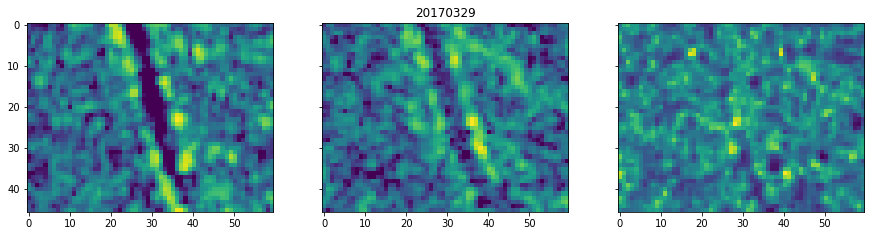

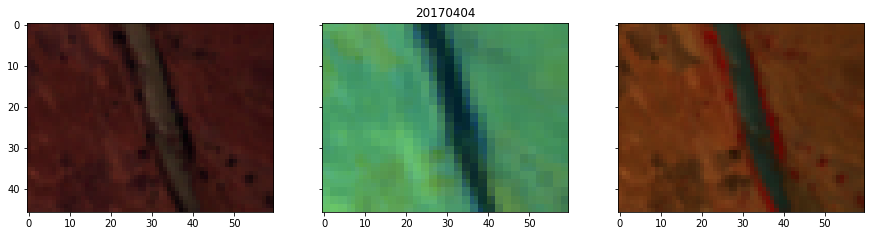

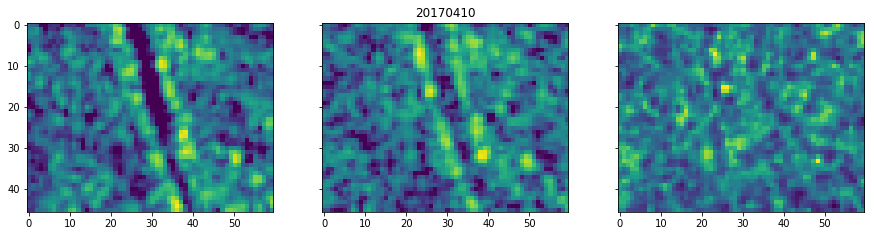

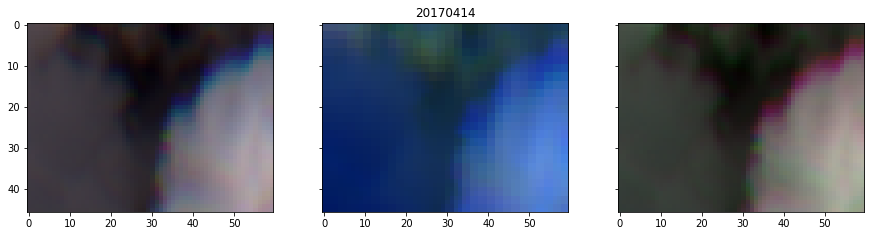

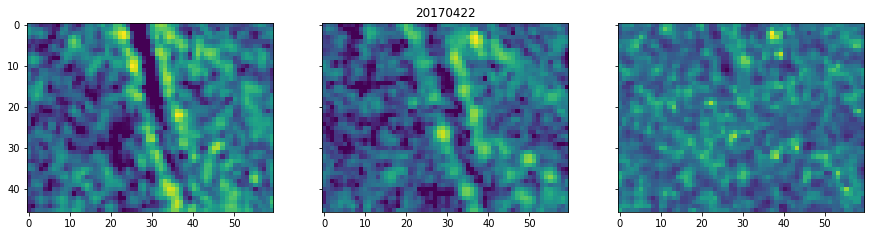

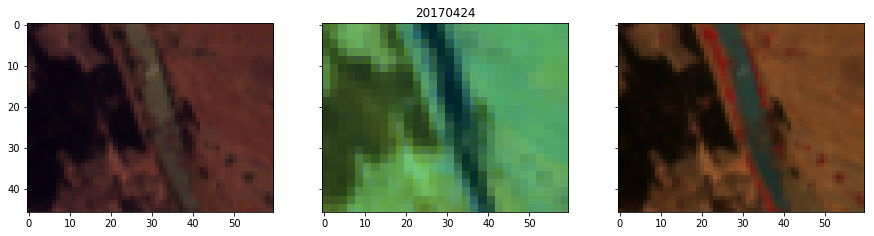

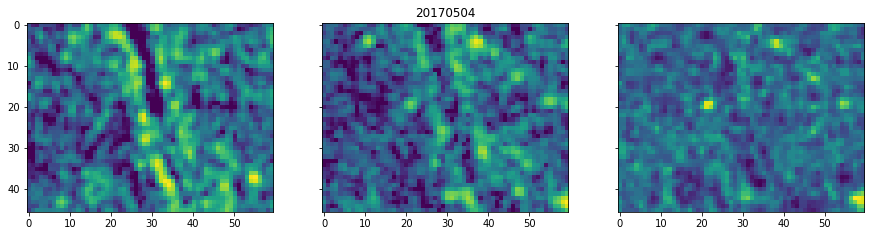

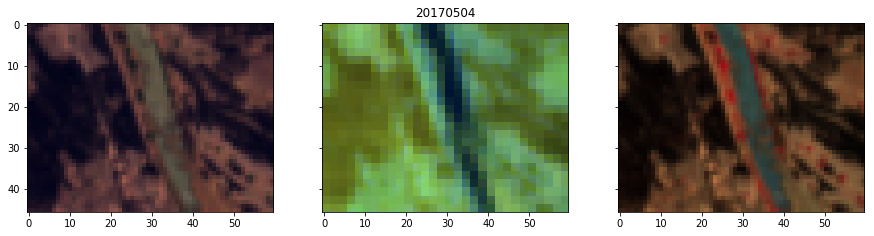

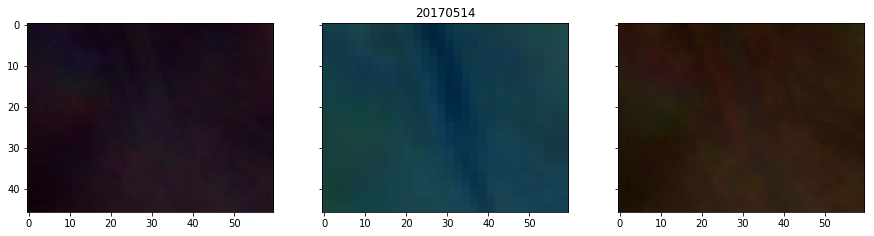

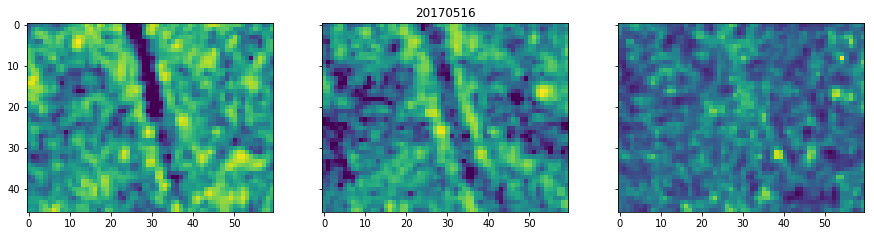

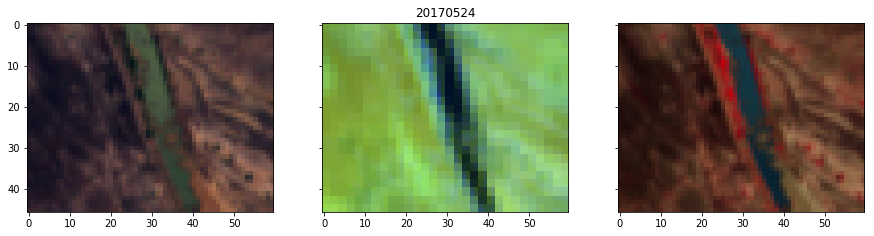

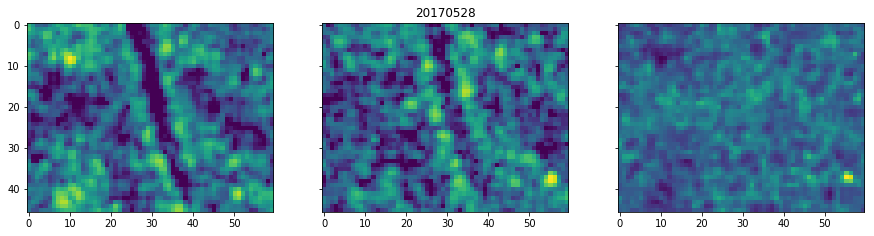

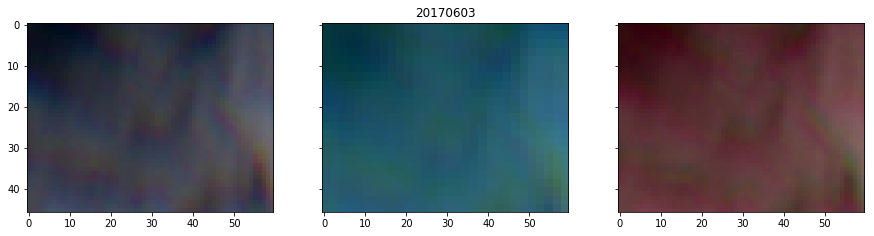

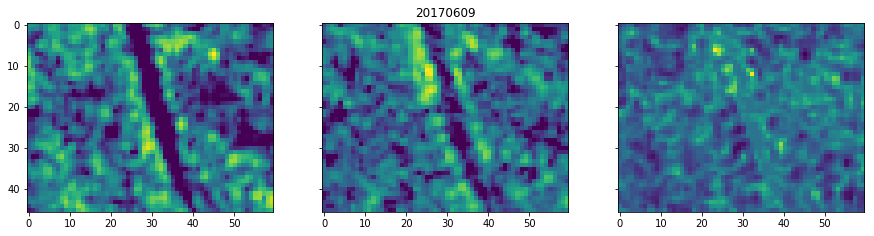

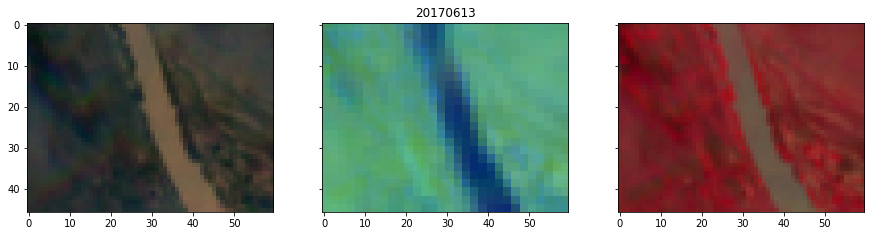

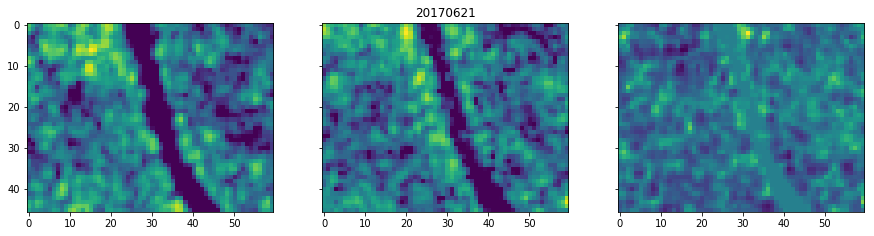

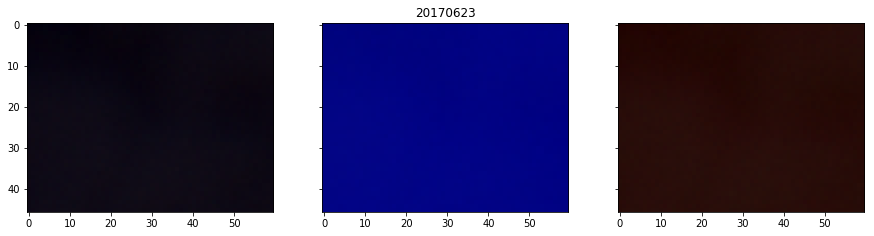

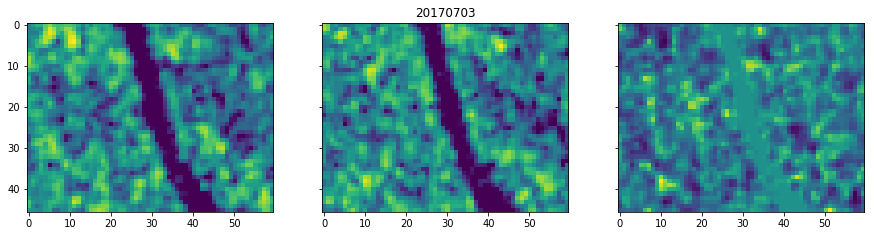

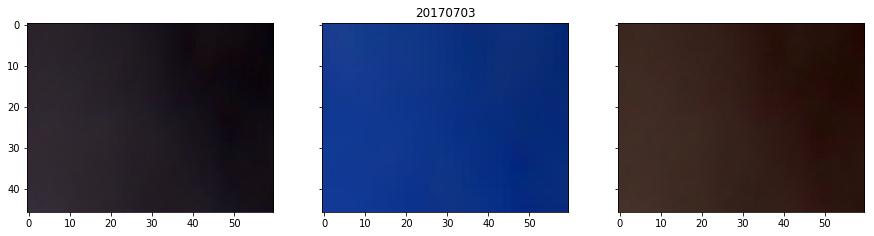

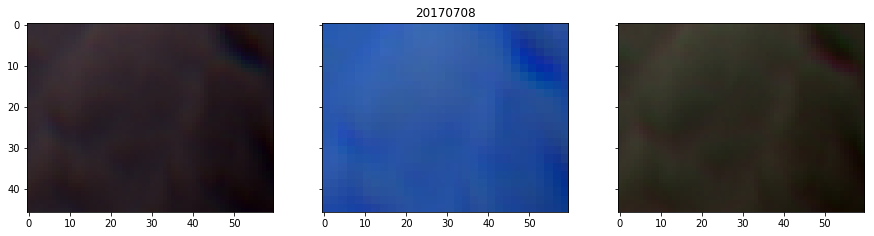

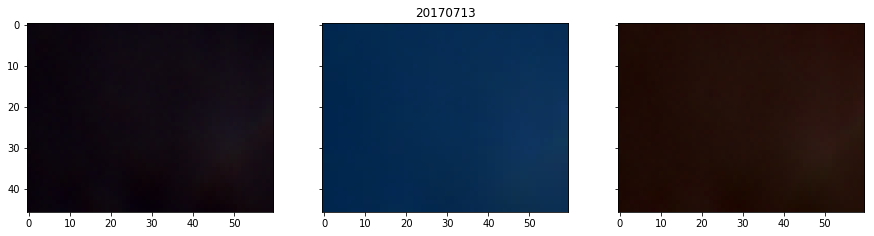

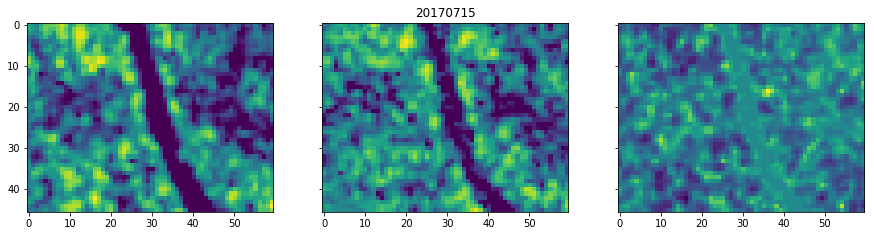

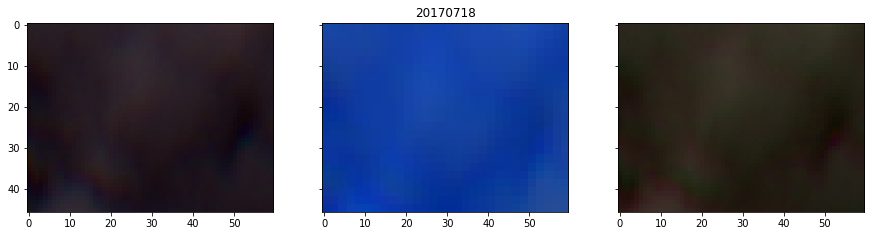

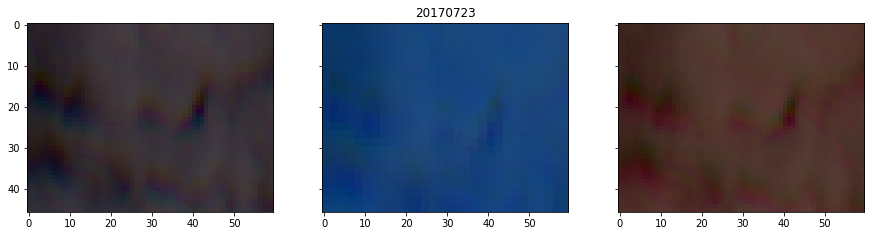

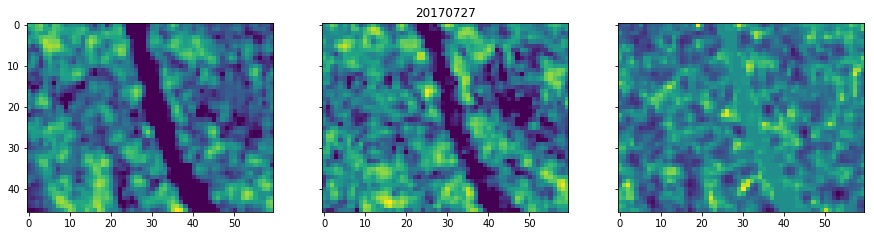

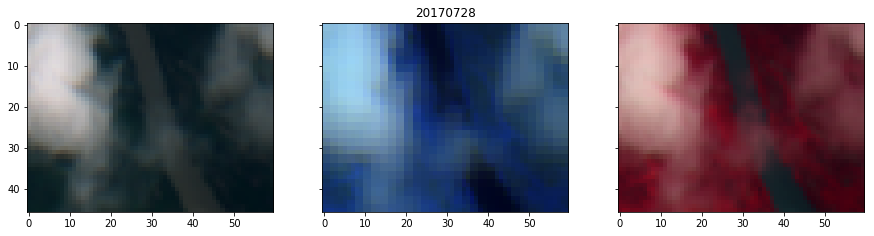

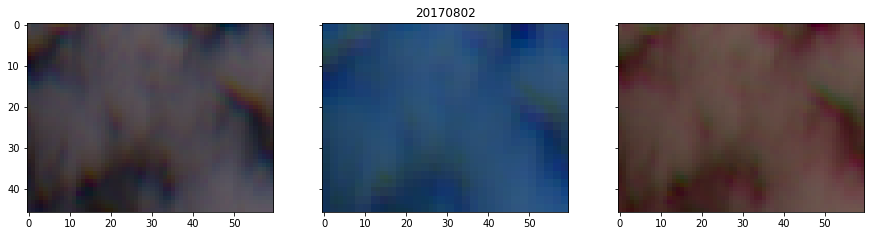

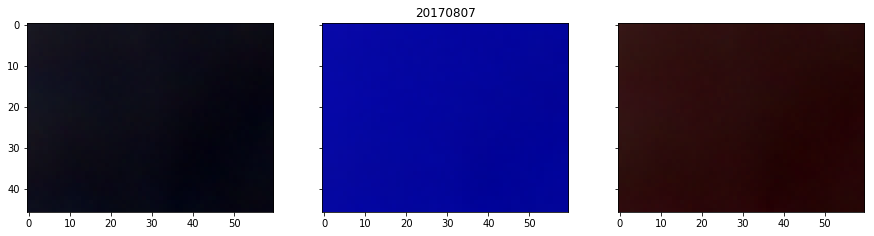

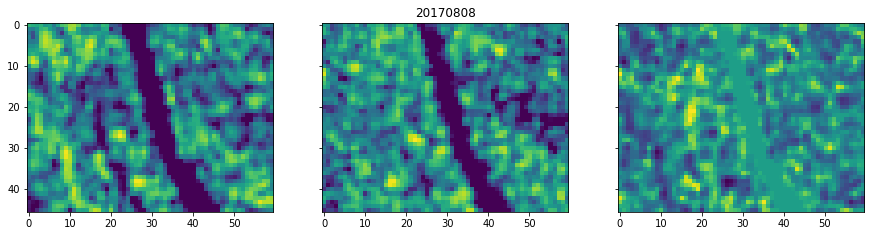

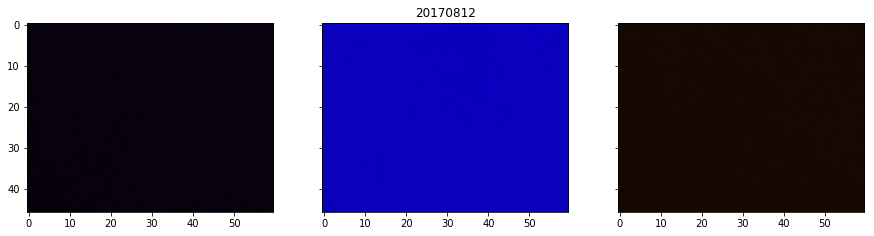

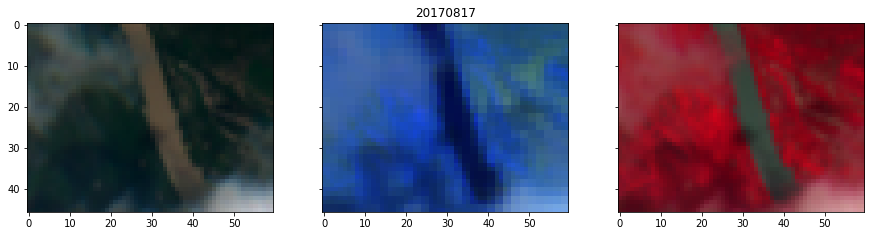

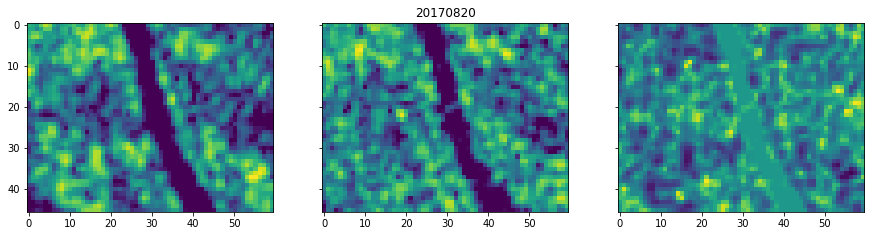

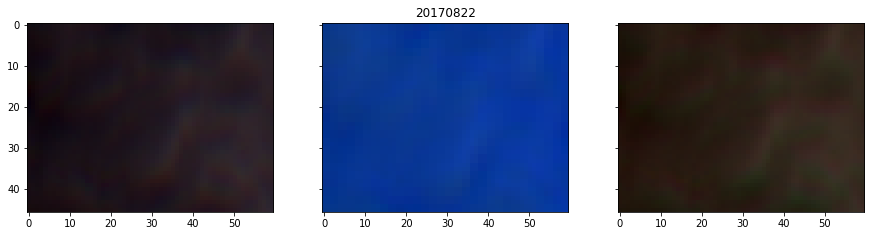

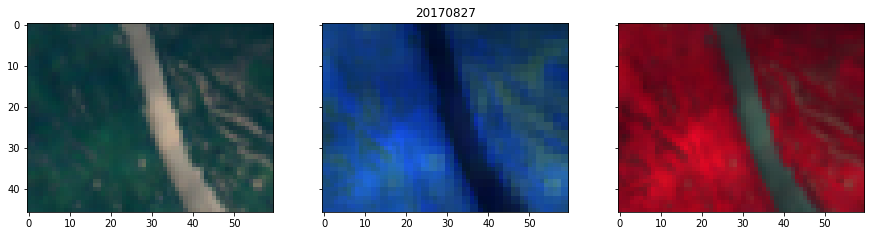

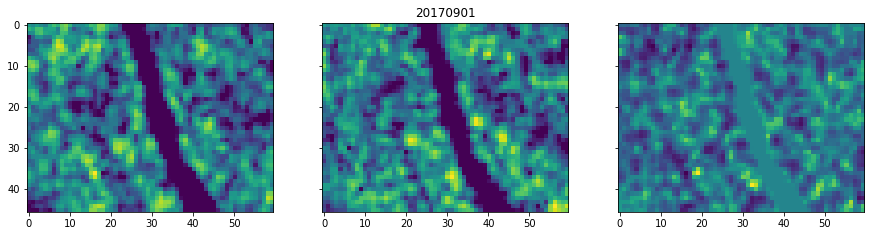

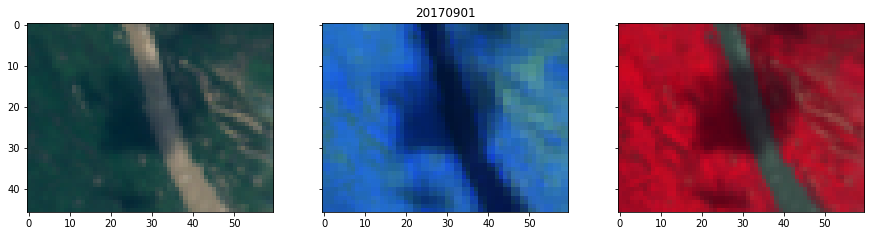

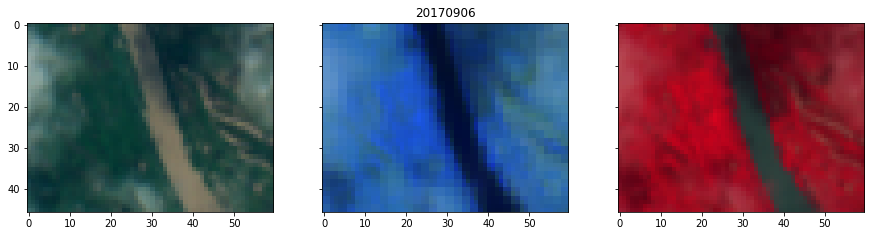

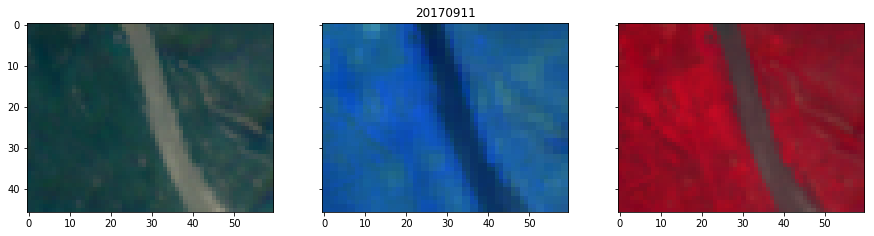

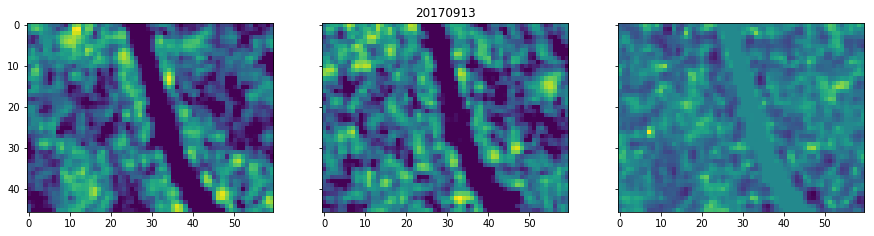

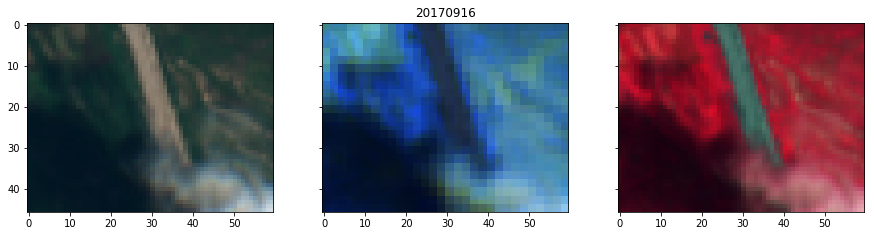

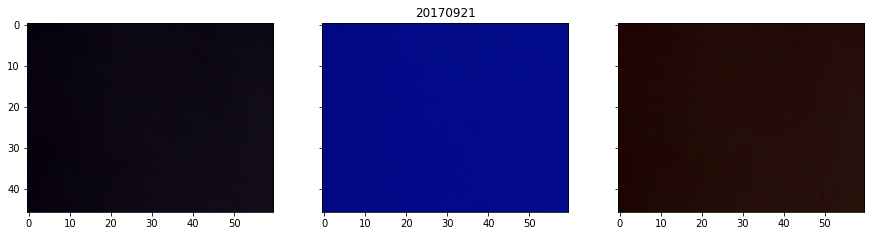

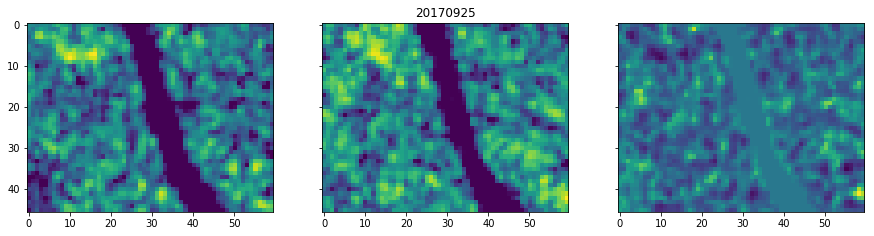

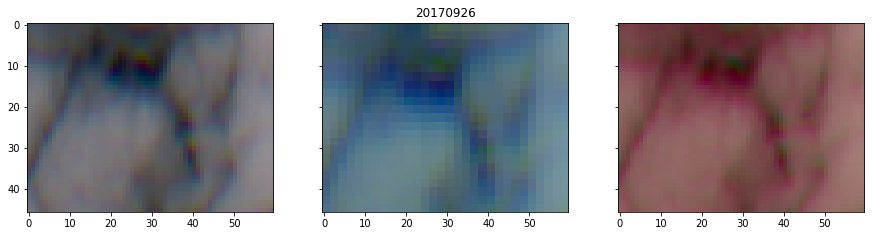

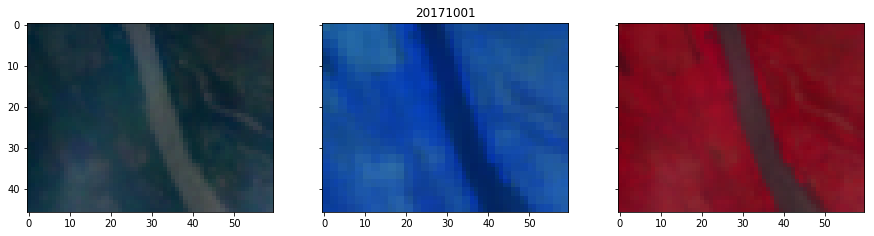

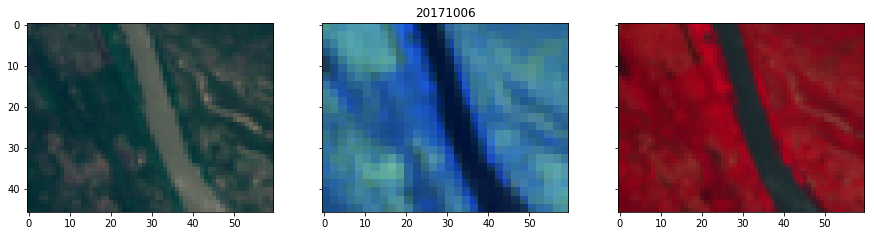

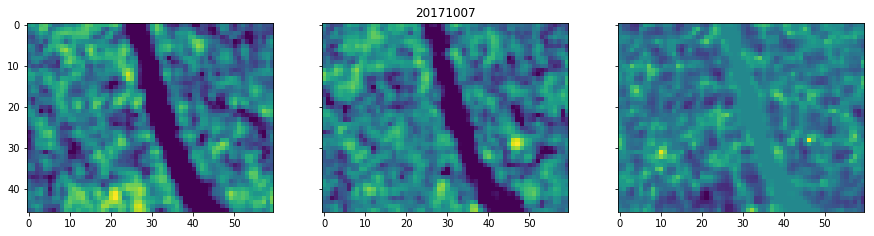

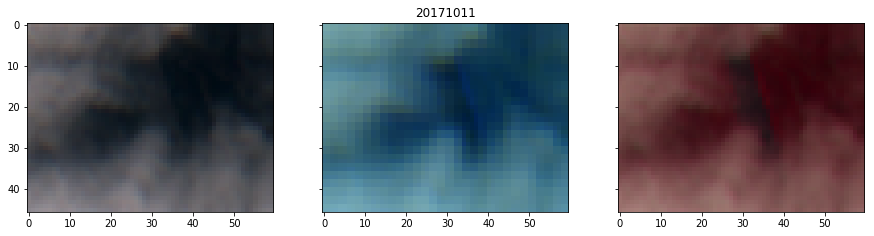

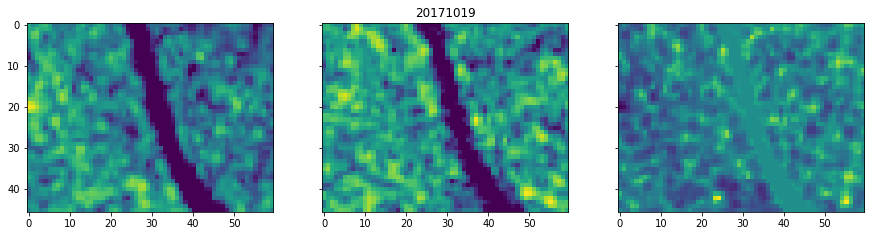

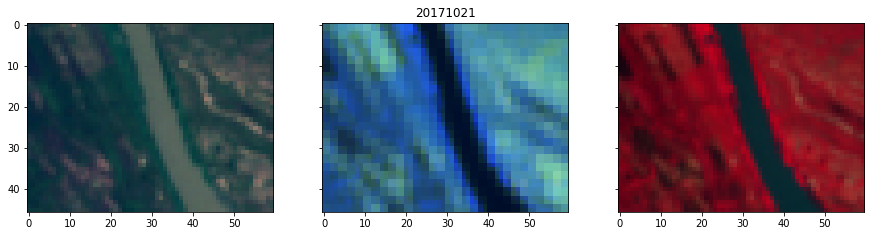

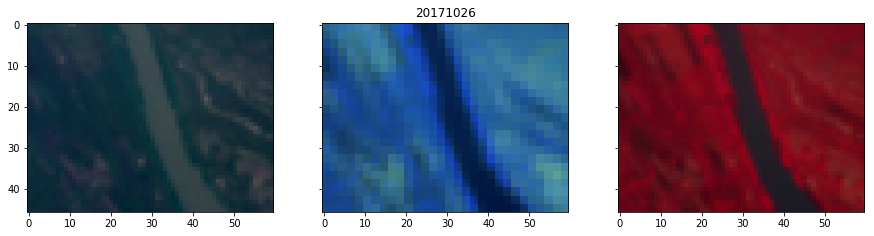

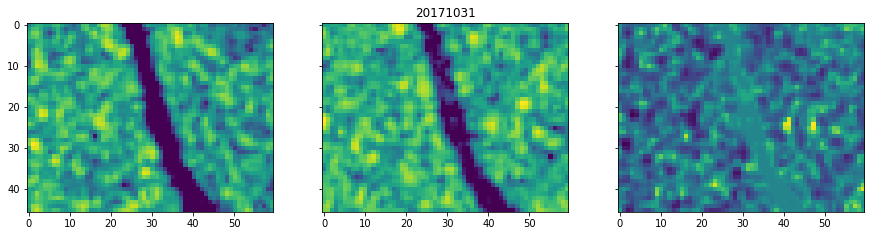

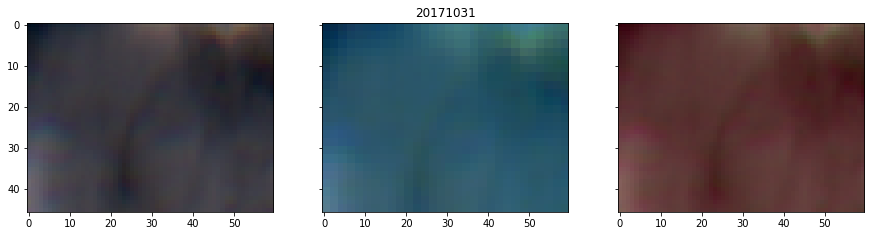

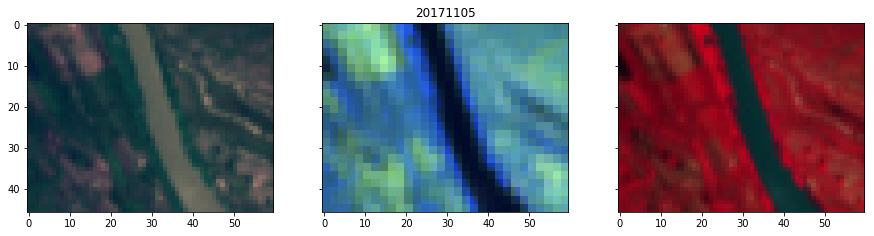

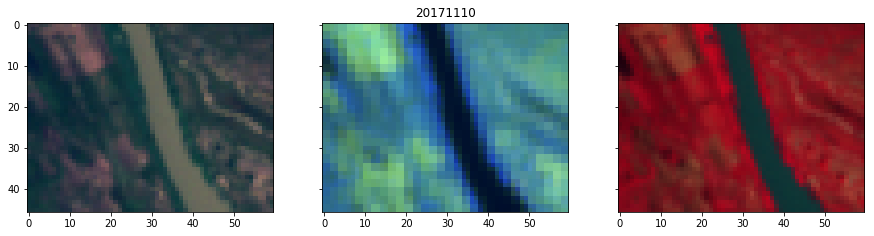

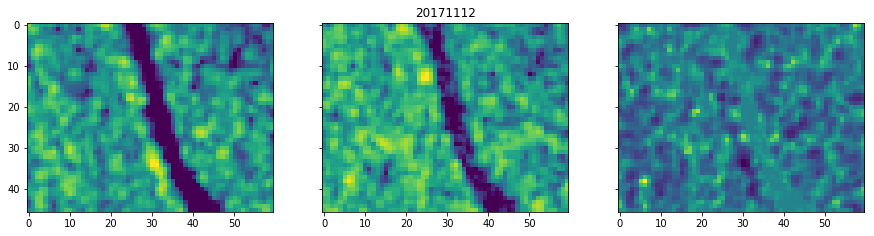

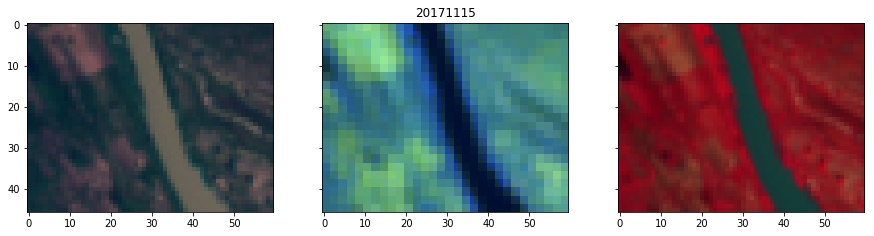

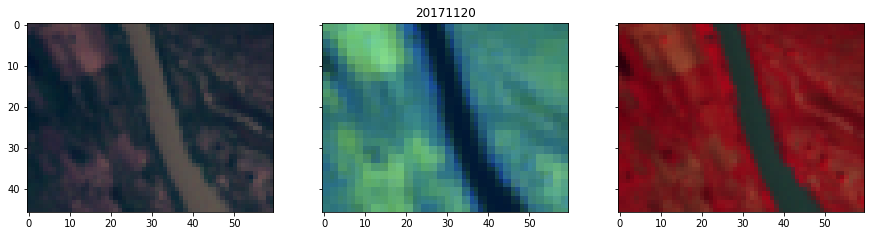

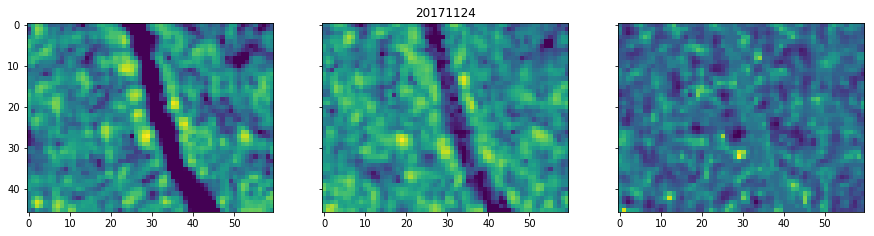

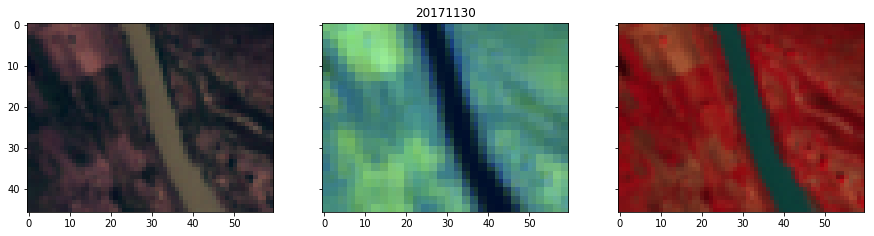

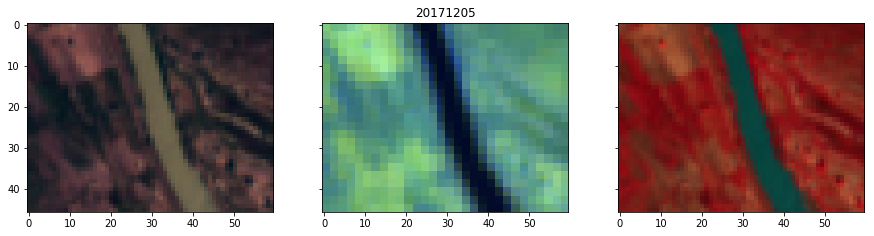

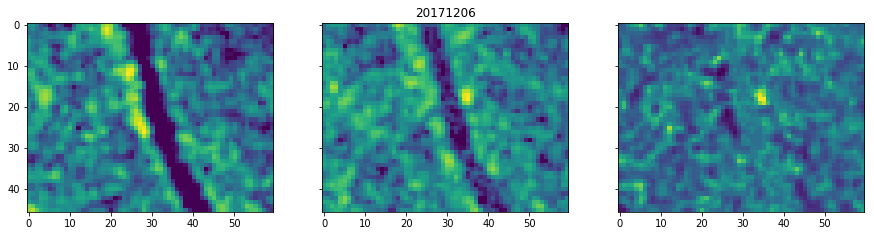

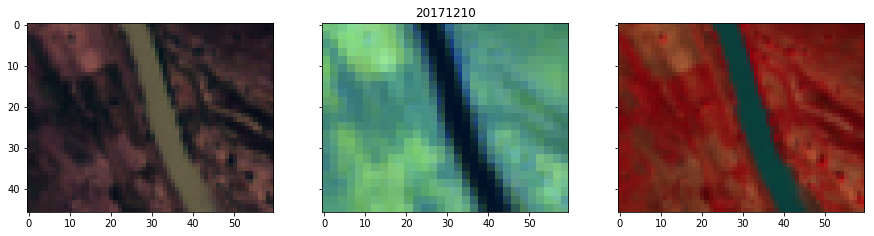

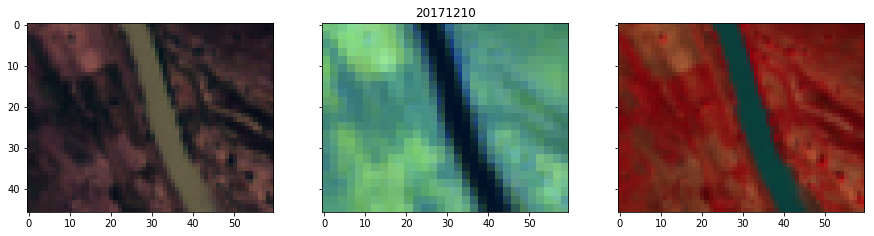

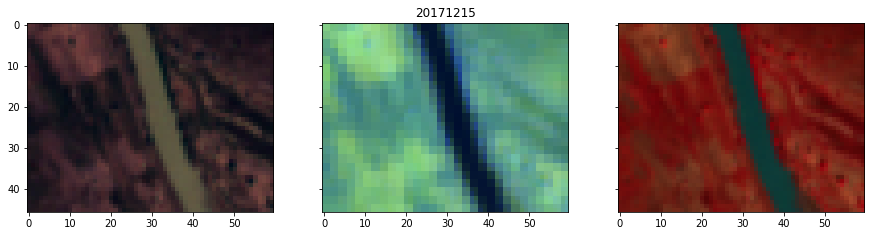

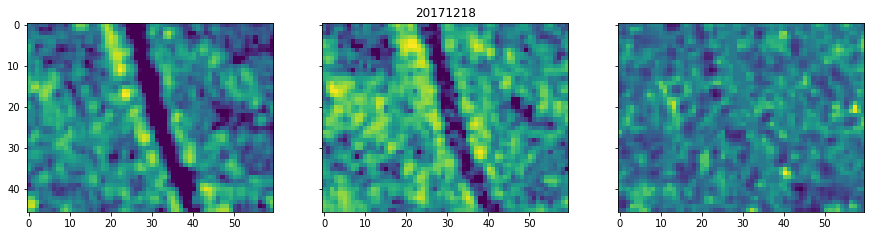

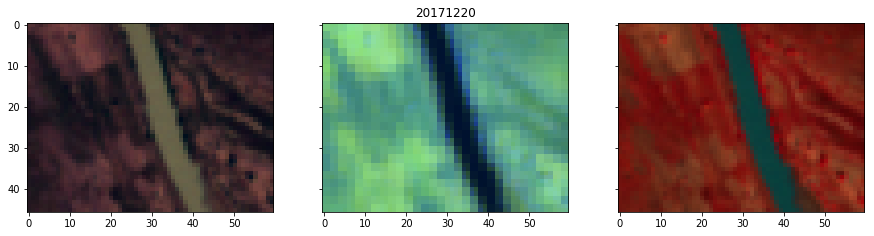

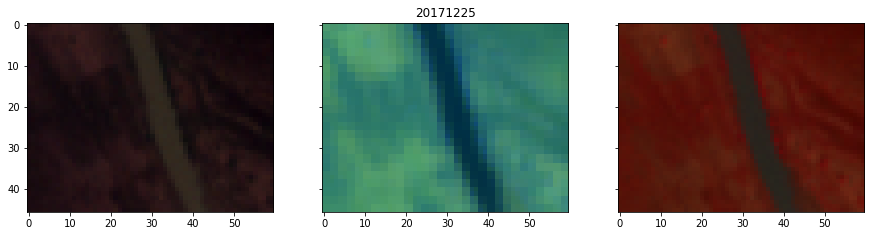

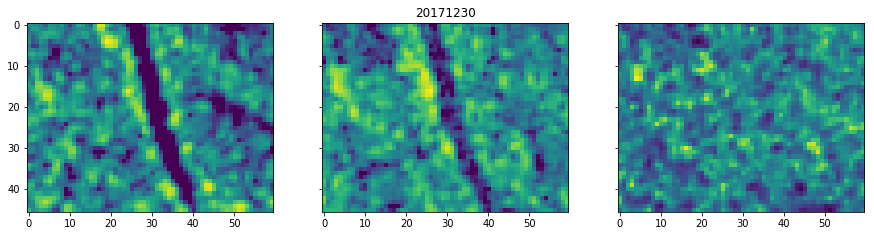

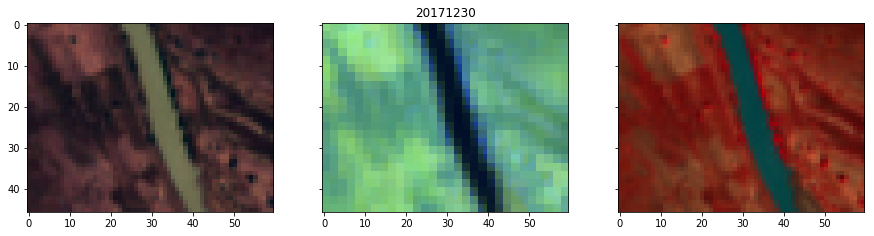

In [3]:
import skimage.feature
data_dir = '/home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/DemoBoxes11-1/'
fnames = []
for fname in os.listdir(data_dir):
    if fname.endswith('tif')==False:
        continue
    fnames.append(fname[17:48])
fnames = list(set(fnames))
fnames.sort()
#print fnames
s1bands = ['VV', 'VH', 'angle']
s2bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
red = s2bands.index('B4')
green = s2bands.index('B3')
blue = s2bands.index('B2')
nir = s2bands.index('B8')
swir1 = s2bands.index('B11')
swir2 = s2bands.index('B12')

for i in range(0,len(fnames)):
    fname = fnames[i]
    imgs = glob.glob(data_dir + 'S1*' + fname + '*.tif')
    if len(imgs)==3:
        for j in range(0,len(imgs)):
            filename = imgs[j]
            ds = Image.open(filename)
            ds_arr = np.array(ds)
            rows,cols = ds_arr.shape
            if j==0:
                data = np.zeros((rows,cols,len(s1bands)))
            data[:,:,j] = ds_arr
#         vvimg = data[:,:,0]
#         vvimg = vvimg - np.min(vvimg)
#         vvimg = np.floor(vvimg*10)
#         vvimg = vvimg.astype(int)
#         #print [np.min(vvimg), np.max(vvimg)]
#         #print vvimg
#         gcor = skimage.feature.greycomatrix(vvimg,[3],[0, np.pi/4, np.pi/2, 3*np.pi/4],symmetric=True,levels=np.max(vvimg)+1)
#         print skimage.feature.greycoprops(gcor, 'dissimilarity')
        f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
        ax1.imshow(data[:,:,0])
        ax2.imshow(data[:,:,1])
        ax3.imshow(data[:,:,0]*1.0/data[:,:,1])
        ax2.set_title(fname[0:8])
        
        #print imgs
    imgs = glob.glob(data_dir + 'S2*' + fname + '*.tif')
    if len(imgs)==16:
        for j in range(0,len(imgs)):
            filename = imgs[j]
            ds = Image.open(filename)
            ds_arr = np.array(ds)
            rows,cols = ds_arr.shape
            if j==0:
                data = np.zeros((rows,cols,len(s2bands)))
            data[:,:,j] = ds_arr
            
        f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
        img_data = data[:,:,[red, green, blue]]
        img_data = (img_data - np.min(img_data))/np.max(img_data)
        ax1.imshow(img_data)
        img_data = data[:,:,[swir2, swir1, nir]]
        img_data = (img_data - np.min(img_data))/np.max(img_data)
        ax2.imshow(img_data)
        img_data = data[:,:,[nir, red, green]]
        img_data = (img_data - np.min(img_data))/np.max(img_data)
        ax3.imshow(img_data)
        ax2.set_title(fname[0:8])
   
            
        
        
    

In [4]:
s2bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
s2bands.index('B2')

1

In [7]:
import skimage